In [4]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
# ----------------------------------------
# 2. Load Dataset
# ----------------------------------------
df = pd.read_csv("Final Project 2 Mall Customer Dataset.csv")
print("Shape of dataset:", df.shape)
print(df.head())

Shape of dataset: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
#-z----------------------------------------
# 3. Data Cleaning & Preprocessing
# ----------------------------------------
df_clean = df.drop("CustomerID", axis=1)

# Encode Gender
le = LabelEncoder()
df_clean["Gender"] = le.fit_transform(df_clean["Gender"])

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

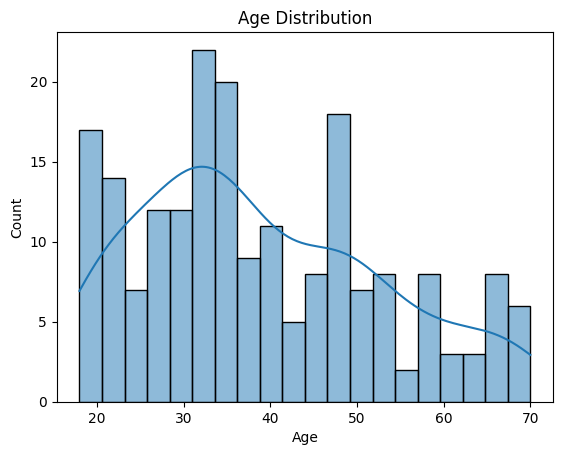

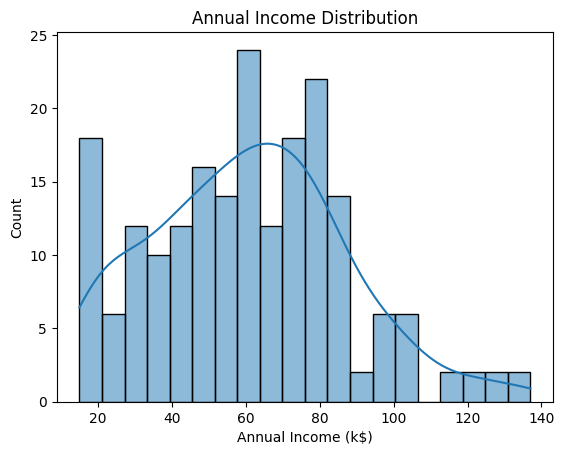

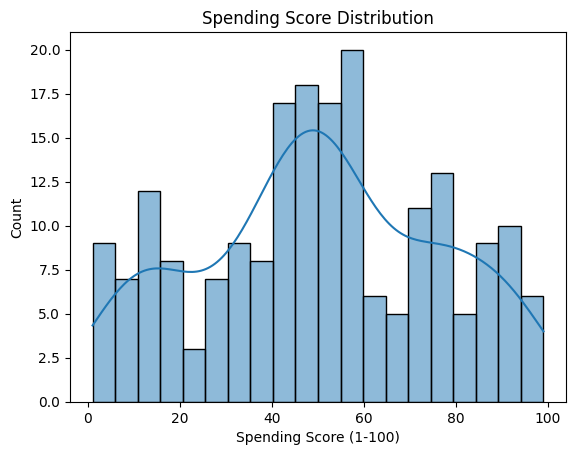

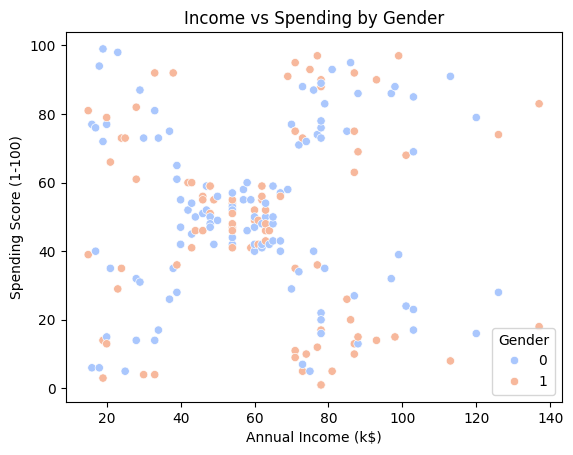

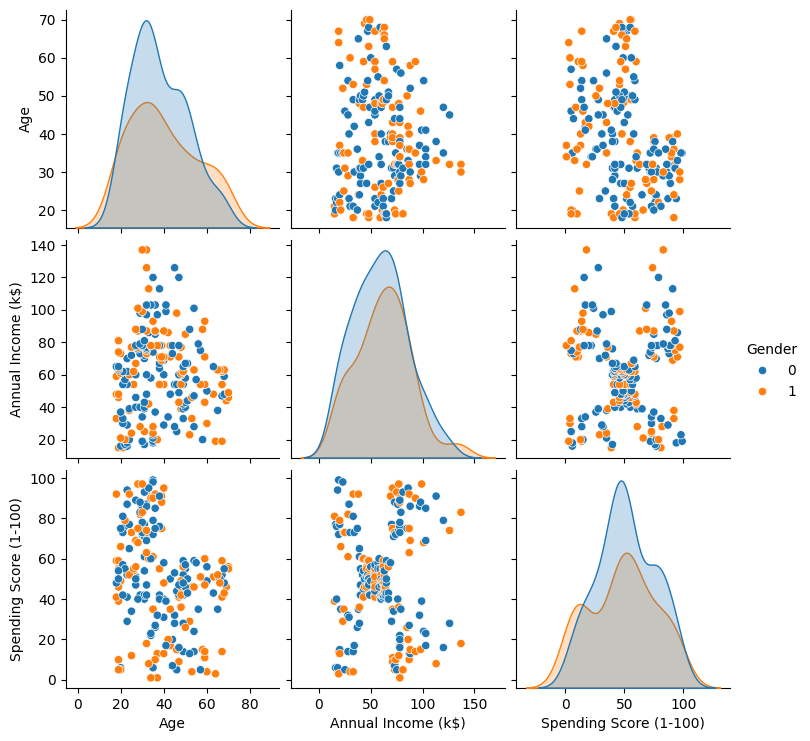

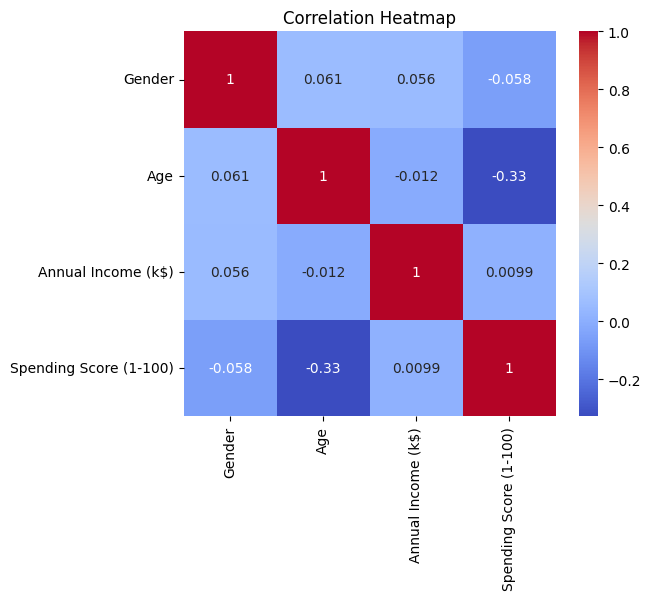

In [7]:
# ----------------------------------------
# 4. Exploratory Data Analysis (EDA)
# ----------------------------------------

# Age Distribution
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Annual Income Distribution
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.show()

# Spending Score Distribution
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.show()

# Scatterplot Income vs Spending
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=df_clean, palette="coolwarm")
plt.title("Income vs Spending by Gender")
plt.show()

# Pairplot
sns.pairplot(df_clean, hue="Gender", diag_kind="kde")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

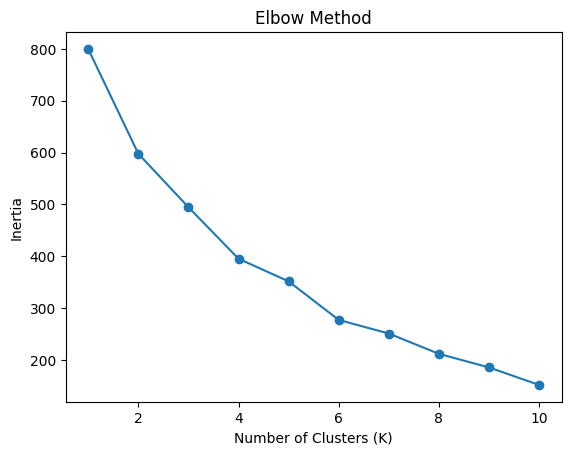

In [8]:
# ----------------------------------------
# 5. KMeans Clustering
# ----------------------------------------
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Elbow Method
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Choose K=5 (from elbow curve)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df_clean["Cluster"] = clusters

In [9]:
# ----------------------------------------
# 6. Evaluation Metrics
# ----------------------------------------
silhouette = silhouette_score(scaled_data, clusters)
db_index = davies_bouldin_score(scaled_data, clusters)
inertia_val = kmeans.inertia_

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", db_index)
print("Inertia:", inertia_val)

# Cluster Summary
print("\nCluster Summary:")
print(df_clean.groupby("Cluster").mean())

Silhouette Score: 0.27191023466188324
Davies-Bouldin Index: 1.181091452406171
Inertia: 351.7432061711911

Cluster Summary:
           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.509804  56.470588           46.098039               39.313725
1        1.000000  39.500000           85.150000               14.050000
2        1.000000  28.690476           60.904762               70.238095
3        0.000000  37.897959           82.122449               54.448980
4        0.000000  27.315789           38.842105               56.210526


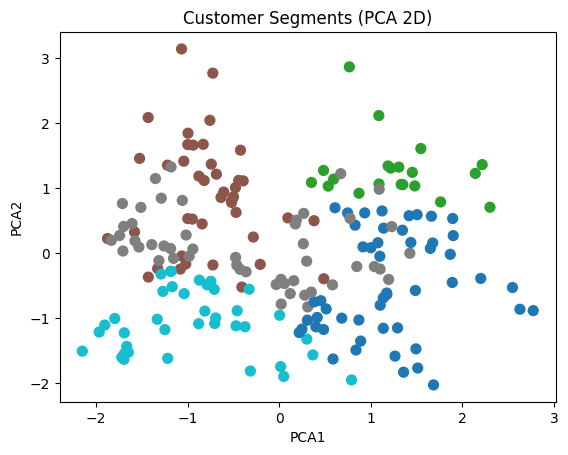

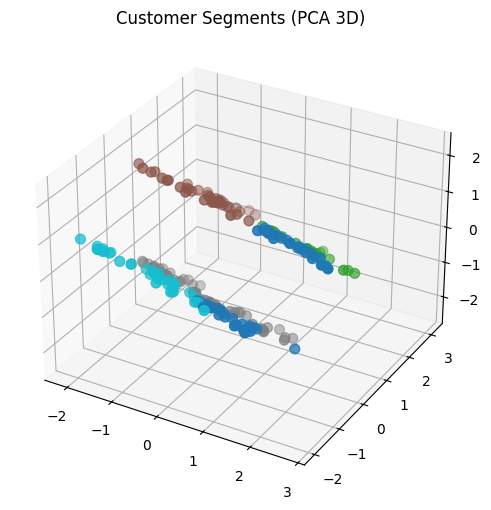

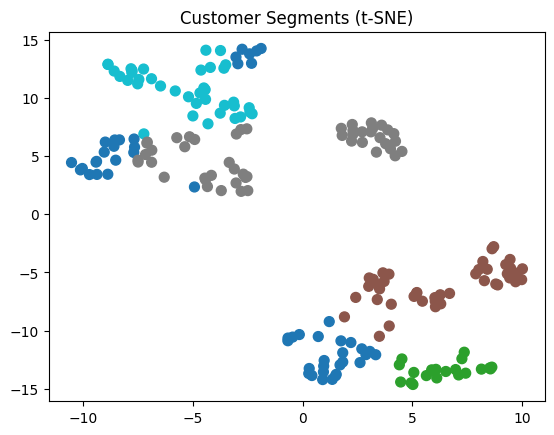

In [10]:
# ----------------------------------------
# 7. Visualization: PCA & t-SNE
# ----------------------------------------

# PCA 2D
pca = PCA(2)
pca_data = pca.fit_transform(scaled_data)
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters, cmap="tab10", s=50)
plt.title("Customer Segments (PCA 2D)")
plt.xlabel("PCA1"); plt.ylabel("PCA2")
plt.show()

# PCA 3D
from mpl_toolkits.mplot3d import Axes3D
pca_3d = PCA(3).fit_transform(scaled_data)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d[:,0], pca_3d[:,1], pca_3d[:,2], c=clusters, cmap="tab10", s=50)
plt.title("Customer Segments (PCA 3D)")
plt.show()

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=clusters, cmap="tab10", s=50)
plt.title("Customer Segments (t-SNE)")
plt.show()

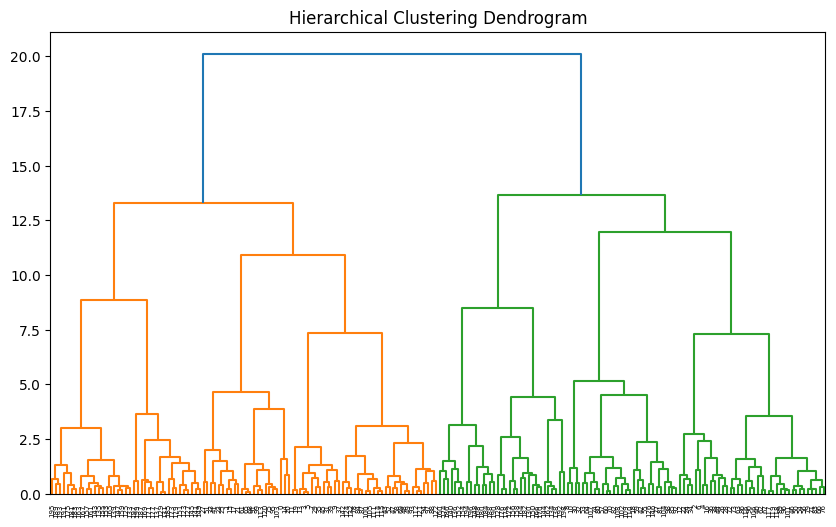

In [11]:
# ----------------------------------------
# 8. Hierarchical Clustering
# ----------------------------------------
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

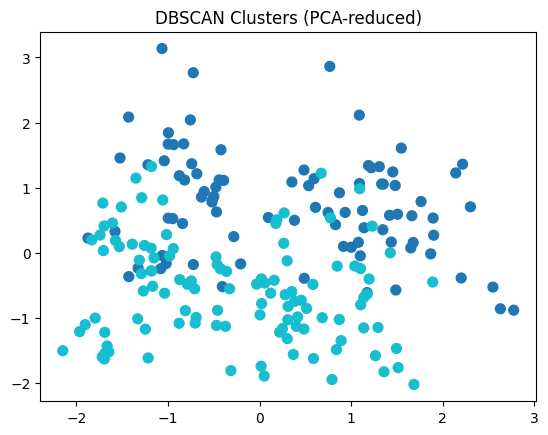

In [12]:
# ----------------------------------------
# 9. DBSCAN Clustering
# ----------------------------------------
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_clusters = dbscan.fit_predict(scaled_data)

plt.scatter(pca_data[:,0], pca_data[:,1], c=db_clusters, cmap="tab10", s=50)
plt.title("DBSCAN Clusters (PCA-reduced)")
plt.show()
